TD3 : Réseaux sémantiques 
Realiser par:  Maguette Mbaye

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

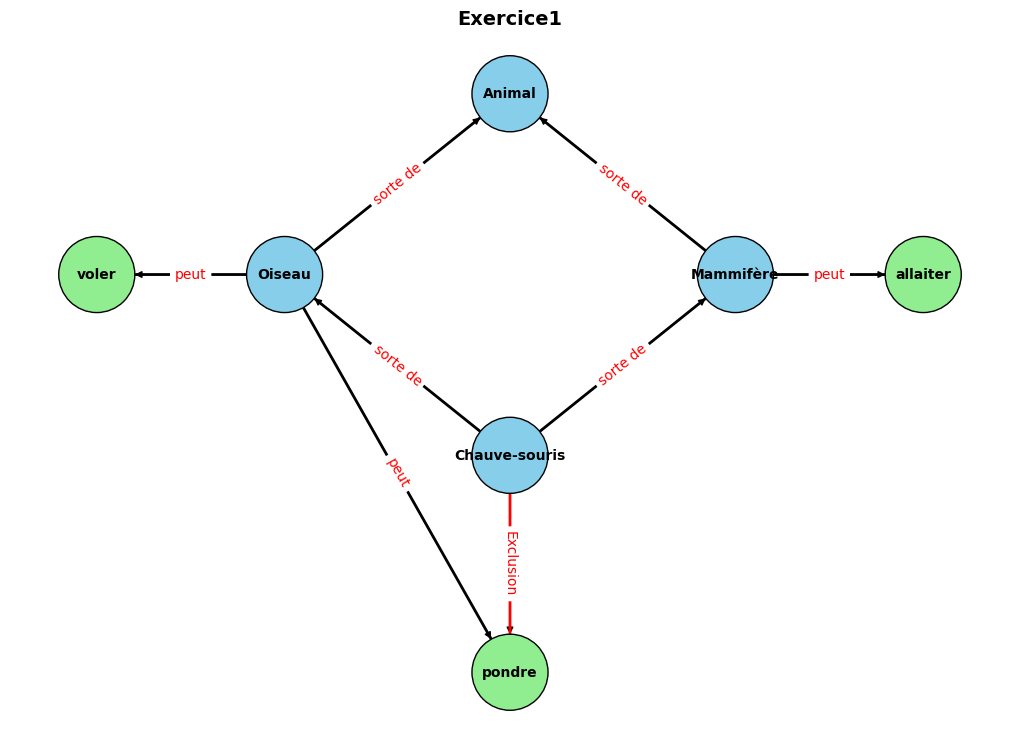

In [14]:
# Création du graphe dirigé
G = nx.DiGraph()

# --- Ajout des noeuds (concepts et actions) ---
G.add_node("Animal", type="concept")
G.add_node("Oiseau", type="concept", peut_voler=True)
G.add_node("Mammifère", type="concept", allaite=True)
G.add_node("Chauve-souris", type="concept", pond_oeufs=False)
G.add_node("voler", type="action")
G.add_node("allaiter", type="action")
G.add_node("pondre", type="action")

# --- Relations hiérarchiques ---
G.add_edge("Oiseau", "Animal", relation="sorte de")
G.add_edge("Mammifère", "Animal", relation="sorte de")
G.add_edge("Chauve-souris", "Oiseau", relation="sorte de")
G.add_edge("Chauve-souris", "Mammifère", relation="sorte de")

# --- Relations d’actions ---
G.add_edge("Oiseau", "voler", relation="peut")
G.add_edge("Mammifère", "allaiter", relation="peut")
G.add_edge("Oiseau", "pondre", relation="peut")
G.add_edge("Chauve-souris", "pondre", relation="Exclusion", exclusion=True)

# --- Fonction pour récupérer les propriétés héritées ---
def get_properties(node):
    props = {}
    props.update(G.nodes[node])
    for ancestor in nx.ancestors(G, node):
        props.update(G.nodes[ancestor])
    return props

# --- Détection automatique des exclusions (conflits) ---
def detect_conflicts(G):
    conflicts = []
    for u, v, data in G.edges(data=True):
        if data.get("exclusion"):
            # Cherche un autre lien vers le même nœud sans exclusion
            for u2, v2, data2 in G.edges(data=True):
                if v == v2 and not data2.get("exclusion") and data2.get("relation") == "peut":
                    conflicts.append((u, u2, v))
    return conflicts

# --- Visualisation du graphe ---
# --- Nouvelle disposition manuelle des noeuds (plus claire) ---
pos = {
    "Animal": (0, 1.5),
    "Oiseau": (-1.2, 0.5),
    "Mammifère": (1.2, 0.5),
    "Chauve-souris": (0, -0.5),

    # Actions placées intelligemment
    "voler": (-2.2, 0.5),
    "allaiter": (2.2, 0.5),
    "pondre": (0, -1.7)
}


node_colors = [
    "skyblue" if G.nodes[n].get("type") == "concept" else "lightgreen"
    for n in G.nodes()
]

edge_labels = nx.get_edge_attributes(G, 'relation')

plt.figure(figsize=(10, 7))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    node_size=3000, font_size=10, font_weight='bold', edgecolors='black'
)

# Colorer les arêtes d’exclusion en rouge
edge_colors = [
    'red' if data.get("exclusion") else 'black'
    for _, _, data in G.edges(data=True)
]

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Exercice1", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()


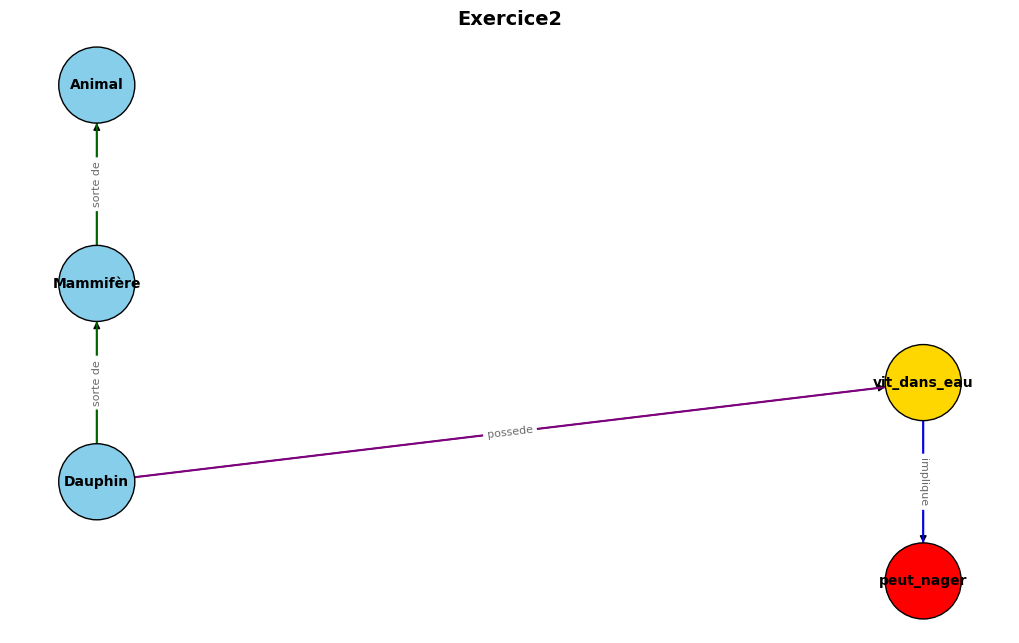

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()

# --- Ajout des noeuds (Concepts et Propriétés/Actions) ---
G.add_node("Animal", type="concept")
G.add_node("Mammifère", type="concept")
G.add_node("Dauphin", type="concept")
G.add_node("vit_dans_eau", type="propriete")
G.add_node("peut_nager", type="action", objectif="Démonstration")

# --- Relations d'Héritage (sorte de) ---
G.add_edge("Mammifère", "Animal", relation="sorte de")
G.add_edge("Dauphin", "Mammifère", relation="sorte de")

# --- Relations de Propriété Directe ---
# Les dauphins vivent dans l’eau.
G.add_edge("Dauphin", "vit_dans_eau", relation="possede") 

# --- Règle de Propagation (Conditionnelle) ---
# Tous les animaux qui vivent dans l’eau peuvent nager. 
# Modélisé comme : Si (propriété 'vit_dans_eau' est présente) ALORS (action 'peut_nager' est déduite)
G.add_edge("vit_dans_eau", "peut_nager", relation="implique") 



def get_deduced_actions(G, node):
    """
    Détermine si une action est déduite pour un nœud par la propagation des propriétés.
    """
    # 1. Identifier toutes les propriétés directement possédées par le nœud
    direct_properties = [v for u, v, data in G.edges(node, data=True) if data.get('relation') in ["possede", "doit"]]
    
    # 2. Vérifier la propagation : Si une propriété implique une action
    deduced_actions = set()
    for prop in direct_properties:
        # Chercher si la propriété est source d'une relation "implique"
        for _, action, data in G.edges(prop, data=True):
            if data.get('relation') == "implique":
                deduced_actions.add(action) # Ici, c'est 'peut_nager'

    return list(deduced_actions)




# Disposition des noeuds pour la clarté
pos = {
    "Animal": (0, 2.0),
    "Mammifère": (0, 1.0),
    "Dauphin": (0, 0.0),
    "vit_dans_eau": (2.5, 0.5),
    "peut_nager": (2.5, -0.5)
}

# Couleurs des noeuds
node_colors = []
for n in G.nodes():
    n_type = G.nodes[n].get("type")
    if n_type == "concept":
        color = "skyblue"
    elif n_type == "propriete":
        color = "gold"
    elif G.nodes[n].get("objectif") == "Démonstration":
        color = "red" # Cible de la démonstration
    else:
        color = "lightgreen"
    node_colors.append(color)

edge_labels = nx.get_edge_attributes(G, 'relation')

plt.figure(figsize=(10, 6))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    node_size=3000, font_size=10, font_weight='bold', edgecolors='black'
)

# Colorer les arêtes d'une manière significative
edge_colors = []
for u, v, data in G.edges(data=True):
    if data.get("relation") == "implique":
        edge_colors.append('blue') # Règle de propagation (Si... alors)
    elif data.get("relation") == "sorte de":
        edge_colors.append('darkgreen') # Héritage (est un type de)
    elif data.get("relation") == "possede":
        edge_colors.append('purple') # Propriété directe
    else:
        edge_colors.append('black')

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5)

# Étiquettes d'arêtes
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels,
    font_color='dimgray',
    font_size=8,
    label_pos=0.5 # Position ajustée au centre
)

plt.title("Exercice2", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

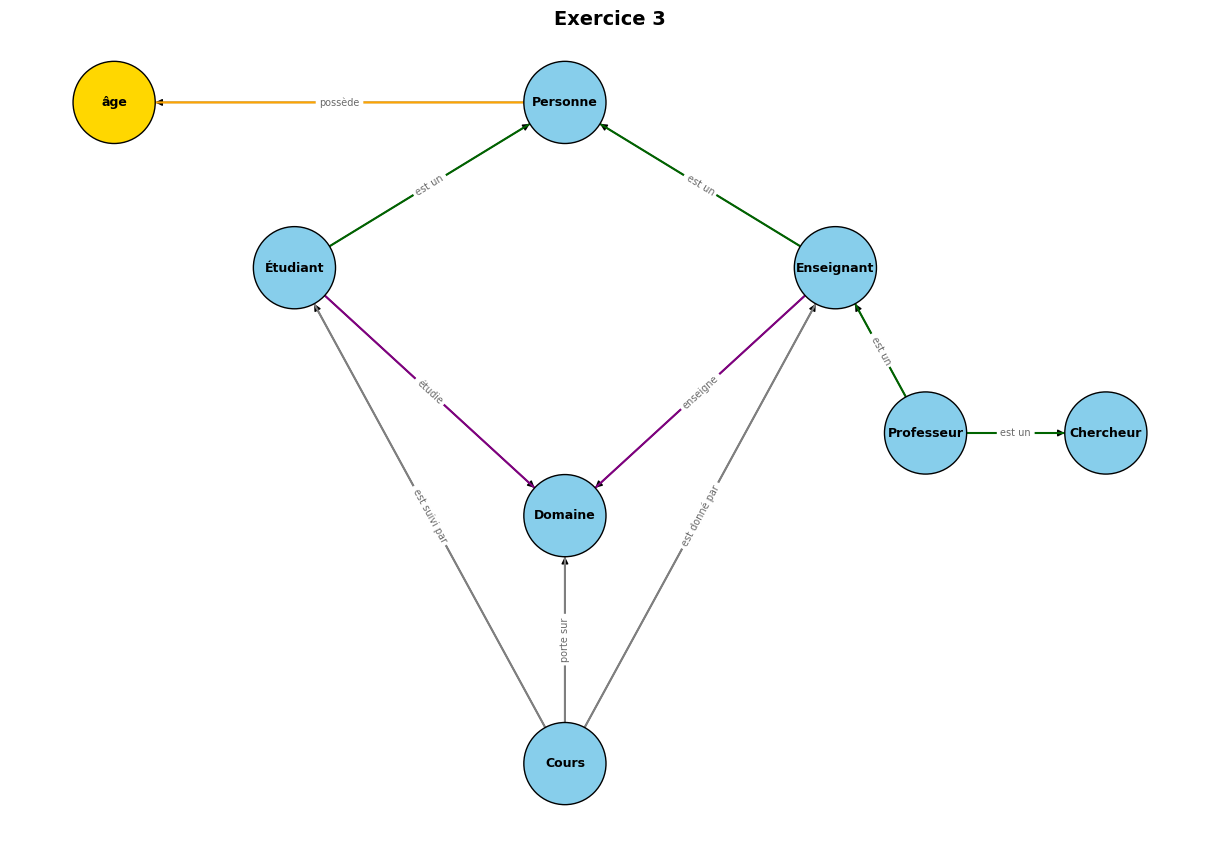

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()



# --- Ajout des noeuds (Concepts et Attributs/Domaines) ---
G.add_node("Personne", type="concept", description="Entité de base")
G.add_node("Étudiant", type="concept")
G.add_node("Enseignant", type="concept")
G.add_node("Chercheur", type="concept")
G.add_node("Professeur", type="concept", heritage="Multiple") # Concept avec héritage multiple
G.add_node("âge", type="attribut", valeur="numérique")
G.add_node("Domaine", type="concept", exemple="Informatique/Biologie")
G.add_node("Cours", type="concept", contrainte="cohésion domaine") # Entité qui porte la contrainte

# --- Relations d'Héritage (ISA) ---
# Un étudiant est une personne
G.add_edge("Étudiant", "Personne", relation="est un") 
# Un enseignant est une personne
G.add_edge("Enseignant", "Personne", relation="est un")
# Un professeur est à la fois enseignant et chercheur (Héritage Multiple)
G.add_edge("Professeur", "Enseignant", relation="est un") 
G.add_edge("Professeur", "Chercheur", relation="est un")

# --- Relations de Propriété/Rôle ---
# Une personne possède un âge
G.add_edge("Personne", "âge", relation="possède") 
# Un étudiant étudie un domaine
G.add_edge("Étudiant", "Domaine", relation="étudie") 
# Un enseignant enseigne un domaine
G.add_edge("Enseignant", "Domaine", relation="enseigne")

# --- Relations Structurantes (Pour la contrainte) ---
# Le cours lie l'enseignant et l'étudiant
G.add_edge("Cours", "Enseignant", relation="est donné par")
G.add_edge("Cours", "Étudiant", relation="est suivi par")
G.add_edge("Cours", "Domaine", relation="porte sur")


# Disposition des noeuds pour illustrer la structure et la contrainte
pos = {
    "Personne": (0, 3.0),
    "Étudiant": (-1.5, 2.0),
    "Enseignant": (1.5, 2.0),
    "Chercheur": (3.0, 1.0),
    "Professeur": (2.0, 1.0), # Hérite de deux parents
    "âge": (-2.5, 3.0),
    "Domaine": (0, 0.5), # Central pour la contrainte
    "Cours": (0, -1.0) # Entité de liaison et de contrainte
}

# Couleurs des noeuds
node_colors = []
for n in G.nodes():
    if G.nodes[n].get("type") == "concept":
        color = "skyblue"
    elif G.nodes[n].get("type") == "attribut":
        color = "gold"
    else:
        color = "lightgray"
    node_colors.append(color)

edge_labels = nx.get_edge_attributes(G, 'relation')

plt.figure(figsize=(12, 8))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    node_size=3500, font_size=9, font_weight='bold', edgecolors='black'
)

# Colorer les arêtes d'une manière significative
edge_colors = []
for u, v, data in G.edges(data=True):
    if data.get("relation") == "est un":
        edge_colors.append('darkgreen') # Héritage
    elif data.get("relation") == "possède":
        edge_colors.append('orange') # Attribut
    elif data.get("relation") in ["étudie", "enseigne"]:
        edge_colors.append('purple') # Rôle
    else:
        edge_colors.append('gray') # Relation structurante (Cours)

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5)

# Étiquettes d'arêtes
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels,
    font_color='dimgray',
    font_size=7,
    label_pos=0.5
)

plt.title("Exercice 3", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

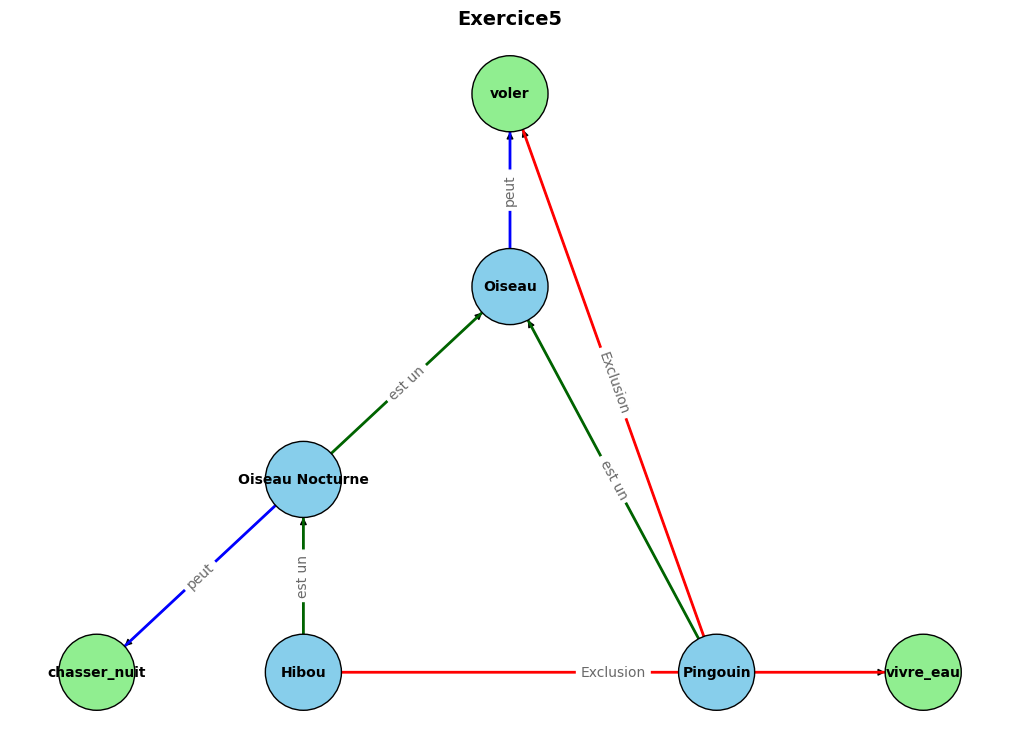

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()


# --- Ajout des noeuds (Concepts et Actions/Propriétés) ---
G.add_node("Oiseau", type="concept")
G.add_node("Oiseau Nocturne", type="concept")
G.add_node("Hibou", type="concept")
G.add_node("Pingouin", type="concept")
G.add_node("voler", type="action")
G.add_node("chasser_nuit", type="action")
G.add_node("vivre_eau", type="propriete")

# --- Relations d'Héritage (ISA) ---
# Les hiboux sont des oiseaux nocturnes.
G.add_edge("Hibou", "Oiseau Nocturne", relation="est un") 
# Les oiseaux nocturnes sont des oiseaux.
G.add_edge("Oiseau Nocturne", "Oiseau", relation="est un")
# Les pingouins sont des oiseaux.
G.add_edge("Pingouin", "Oiseau", relation="est un")

# --- Relations de Propriété / Capacité ---
# Les oiseaux peuvent voler. (Règle générale, POUVOIR par défaut)
G.add_edge("Oiseau", "voler", relation="peut")
# Les oiseaux nocturnes chassent la nuit.
G.add_edge("Oiseau Nocturne", "chasser_nuit", relation="peut")

# --- Relations d'Exclusion / Surcharge (Résolution de conflit) ---
# Les pingouins sont des oiseaux mais NE volent pas. (Exclusion spécifique)
G.add_edge("Pingouin", "voler", relation="Exclusion", exclusion=True) 
# Les hiboux NE vivent pas dans l’eau. (Exclusion spécifique)
G.add_edge("Hibou", "vivre_eau", relation="Exclusion", exclusion=True) 



# Disposition des noeuds
pos = {
    "Oiseau": (0, 3),
    "Oiseau Nocturne": (-1.5, 2),
    "Hibou": (-1.5, 1),
    "Pingouin": (1.5, 1),
    "voler": (0, 4),
    "chasser_nuit": (-3.0, 1),
    "vivre_eau": (3.0, 1)
}

# Couleurs des noeuds
node_colors = ["skyblue" if G.nodes[n].get("type") == "concept" else "lightgreen" for n in G.nodes()]
edge_labels = nx.get_edge_attributes(G, 'relation')

plt.figure(figsize=(10, 7))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    node_size=3000, font_size=10, font_weight='bold', edgecolors='black'
)

# Colorer les arêtes d’exclusion en rouge
edge_colors = []
for u, v, data in G.edges(data=True):
    if data.get("exclusion"):
        edge_colors.append('red') # Exclusion
    elif data.get("relation") == "est un":
        edge_colors.append('darkgreen') # Héritage
    elif data.get("relation") == "peut":
        edge_colors.append('blue') # Capacité / Propriété
    else:
        edge_colors.append('black')

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='dimgray')

plt.title("Exercice5", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

In [18]:
import networkx as nx

# Création du graphe dirigé
G = nx.DiGraph()

# --- Ajout des noeuds ---
G.add_node("Fièvre", type="symptôme")
G.add_node("Toux", type="symptôme")
G.add_node("DouleurPoitrine", type="symptôme")
G.add_node("Maladie", type="concept")
G.add_node("MaladieRespiratoire", type="concept")
G.add_node("Grippe", type="maladie")
G.add_node("Pneumonie", type="maladie")

# --- Relations de structure ---
G.add_edge("Grippe", "MaladieRespiratoire", relation="isa")
G.add_edge("Pneumonie", "MaladieRespiratoire", relation="isa")
G.add_edge("MaladieRespiratoire", "Maladie", relation="isa") 

# --- Relations Symptôme/Maladie ---
# Fièvre -> symptôme -> Maladie
G.add_edge("Fièvre", "Maladie", relation="symptôme pour") 
# Toux -> symptôme -> MaladieRespiratoire
G.add_edge("Toux", "MaladieRespiratoire", relation="symptôme pour") 

# --- Relations Spécifiques (hasSymptom) ---
# Grippe -> hasSymptom -> Fièvre, Toux
G.add_edge("Grippe", "Fièvre", relation="hasSymptom")
G.add_edge("Grippe", "Toux", relation="hasSymptom")

# Pneumonie -> hasSymptom -> Fièvre, DouleurPoitrine
G.add_edge("Pneumonie", "Fièvre", relation="hasSymptom")
G.add_edge("Pneumonie", "DouleurPoitrine", relation="hasSymptom")

# --- Détection (Logique) ---
def detect_possible_diseases(G, symptoms):
    possible_diseases = []
    
    # Parcourir toutes les maladies (identifiées ici par type ou par inspection)
    for disease in ["Grippe", "Pneumonie"]:
        # Vérifier si la maladie possède TOUS les symptômes requis
        has_all_symptoms = True
        
        # Récupérer les symptômes déclarés pour cette maladie
        disease_symptoms = set()
        for _, symptom, data in G.out_edges(disease, data=True):
            if data.get('relation') == "hasSymptom":
                disease_symptoms.add(symptom)
        
        # Filtrer
        for required_symptom in symptoms:
            if required_symptom not in disease_symptoms:
                has_all_symptoms = False
                break
                
        if has_all_symptoms:
            possible_diseases.append(disease)
            
    return possible_diseases

symptoms_patient = ["Fièvre", "Toux"]
result = detect_possible_diseases(G, symptoms_patient)

print("Résultat du Diagnostic par Réseau Sémantique(Exercice7)")
print(f"Symptômes du patient : {', '.join(symptoms_patient)}")
print(f"Maladies possibles (correspondance exacte des symptômes) : {', '.join(result)}")

Résultat du Diagnostic par Réseau Sémantique(Exercice7)
Symptômes du patient : Fièvre, Toux
Maladies possibles (correspondance exacte des symptômes) : Grippe


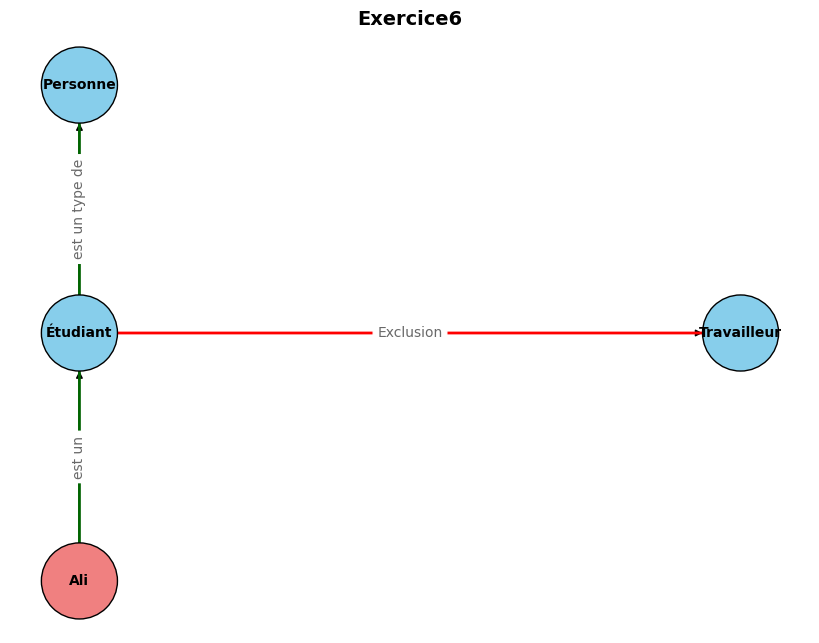

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()


G.add_node("Personne", type="concept")
G.add_node("Étudiant", type="concept")
G.add_node("Travailleur", type="concept")
G.add_node("Ali", type="individu") # L'individu spécifique



# (∀x) Étudiant(x) → Personne(x) : Héritage (ISA)
G.add_edge("Étudiant", "Personne", relation="est un type de")

# (∀x) Étudiant(x) → ¬Travailleur(x) : Exclusion
G.add_edge("Étudiant", "Travailleur", relation="Exclusion", exclusion=True)

# Étudiant(Ali) : Instanciation
G.add_edge("Ali", "Étudiant", relation="est un")


pos = {
    "Personne": (0, 2),
    "Étudiant": (0, 1),
    "Travailleur": (2, 1), # Séparé pour illustrer la disjonction
    "Ali": (0, 0)
}

# Couleurs des nœuds
node_colors = []
for n in G.nodes():
    n_type = G.nodes[n].get("type")
    if n_type == "concept":
        color = "skyblue"
    elif n_type == "individu":
        color = "lightcoral"
    else:
        color = "lightgray"
    node_colors.append(color)

edge_labels = nx.get_edge_attributes(G, 'relation')

plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    node_size=3000, font_size=10, font_weight='bold', edgecolors='black'
)

# Colorer l'arête d'exclusion en rouge
edge_colors = ['red' if data.get("exclusion") else 'darkgreen' for _, _, data in G.edges(data=True)]

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='dimgray')

plt.title("Exercice6", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

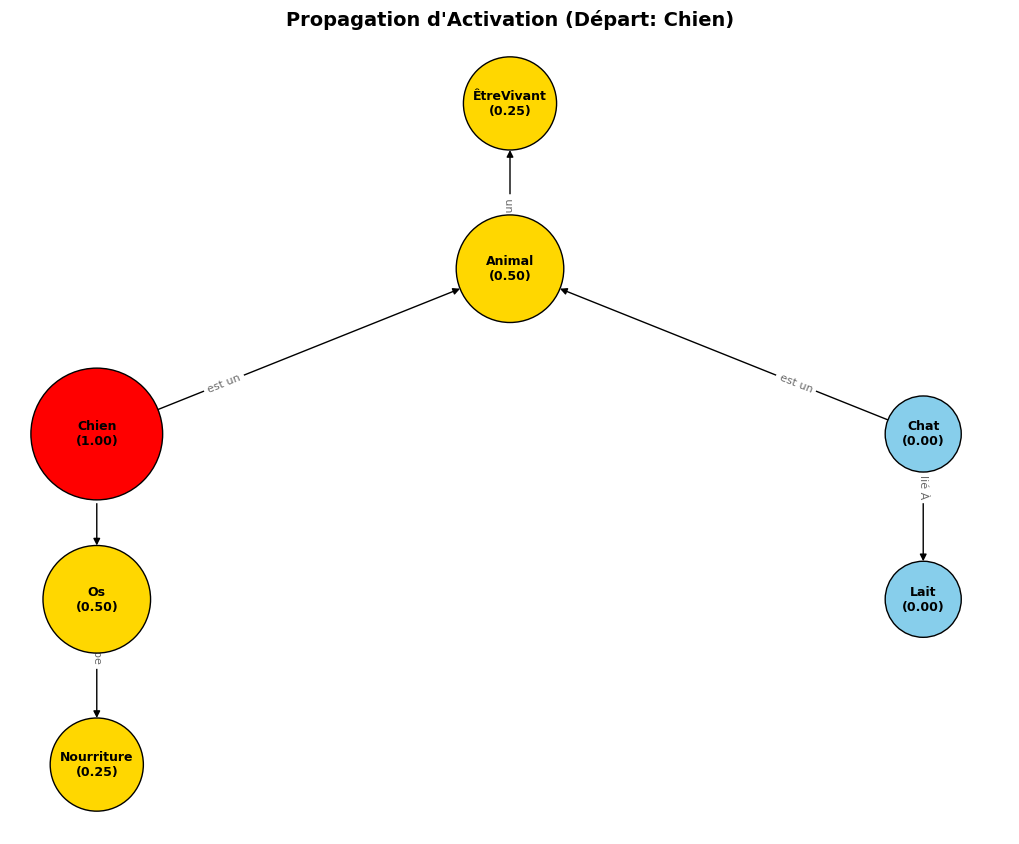

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe dirigé
G = nx.DiGraph()

# --- Ajout des noeuds ---
G.add_node("Chien", type="concept")
G.add_node("Chat", type="concept")
G.add_node("Animal", type="concept")
G.add_node("ÊtreVivant", type="concept")
G.add_node("Os", type="objet")
G.add_node("Lait", type="objet")
G.add_node("Nourriture", type="concept")

# --- Ajout des arêtes ---
G.add_edge("Chien", "Animal", relation="est un")
G.add_edge("Chat", "Animal", relation="est un")
G.add_edge("Animal", "ÊtreVivant", relation="est un")
G.add_edge("Chien", "Os", relation="lié À")
G.add_edge("Chat", "Lait", relation="lié À")
G.add_edge("Os", "Nourriture", relation="type")

def spreading_activation(G, start_node, max_level=3, factor=0.5):
    """
    Simule la propagation d'activation simple dans le graphe G en utilisant
    la distance (niveau) pour calculer l'atténuation.
    """
    total_activation = {node: 0.0 for node in G.nodes()}
    total_activation[start_node] = 1.0 # Activation initiale

    for target_node in G.nodes():
        try:
            # Calculer la distance (longueur du chemin le plus court)
            path_length = nx.shortest_path_length(G, source=start_node, target=target_node)
            
            if path_length <= max_level and path_length > 0:
                # Activation = Activation_Initiale (1.0) * Factor^(distance)
                activation_value = 1.0 * (factor ** path_length)
                
                # Mise à jour de l'activation totale (si déjà activé, on prend l'activation la plus élevée/proche)
                # Dans ce cas, les chemins sont uniques, donc simple affectation.
                total_activation[target_node] = activation_value
                
        except nx.NetworkXNoPath:
            # Le nœud n'est pas atteignable, l'activation reste 0.0
            pass
            
    return total_activation

# --- Exécution de la Simulation ---
final_activations = spreading_activation(G, start_node="Chien", max_level=3, factor=0.5)

# Disposition des noeuds
pos = {
    "Chien": (-2.5, 2),
    "Chat": (2.5, 2),
    "Animal": (0, 3),
    "ÊtreVivant": (0, 4),
    "Os": (-2.5, 1),
    "Lait": (2.5, 1),
    "Nourriture": (-2.5, 0)
}

# Couleurs et tailles basées sur l'activation finale
node_sizes = [3000 + act * 6000 for act in final_activations.values()]
node_colors = [
    'red' if node == "Chien" else ('gold' if act > 0 else 'skyblue')
    for node, act in final_activations.items()
]
# Étiquette affichant le nom et l'activation finale
node_labels = {
    n: f"{n}\n({final_activations[n]:.2f})" 
    for n in G.nodes()
}

edge_labels = nx.get_edge_attributes(G, 'relation')

plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=False, node_color=node_colors,
    node_size=node_sizes, font_weight='bold', edgecolors='black'
)

# Affichage des étiquettes des noeuds avec l'activation
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_weight='bold')

# Étiquettes d'arêtes
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels,
    font_color='dimgray',
    font_size=8,
    label_pos=0.3
)

plt.title("Exercice4", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()